In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [2]:
df = pd.read_csv('housing_data.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [3]:
df.columns = df.columns.str.strip()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [7]:
X = df.drop('MEDV',axis=1)
y = df['MEDV']


In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)


In [10]:
model = LinearRegression()

model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test,y_pred)
mse

38.17966016809935

In [12]:
r2 = r2_score(y_test,y_pred)
r2

0.6633993556963764

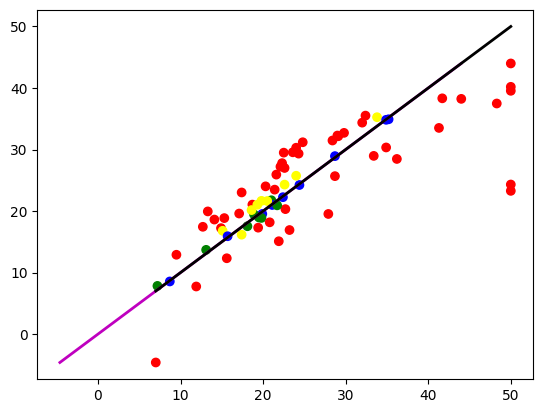

In [23]:
import matplotlib.pyplot as plt
import numpy as np

diff = np.abs(y_test- y_pred)
colors = ['blue'] * len(diff)
for i, d in enumerate(diff):
    if d>=2 :
        colors[i] = 'red'
    elif d>=1:
        colors[i] = 'yellow'
    elif d>=0.5:
        colors[i] = 'green'





plt.scatter(y_test,y_pred,c=colors)
plt.plot([y_pred.min(),y_pred.max()], [y_pred.min(), y_pred.max()],'m',lw=2 )
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],'k',lw=2)  # Diagonal line

plt.show()